In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Undersampling Function

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

def undersample(df, target  ):

    X = df.drop(target, axis=1)
    y = df[target]

    # Define the undersampler
    undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)

    # Apply undersampling to balance the classes
    X_resampled, y_resampled = undersampler.fit_resample(X, y)

    # Create a new DataFrame with the resampled data
    #resampled_df = pd.concat([X_resampled, y_resampled], axis=1)

    return  X_resampled, y_resampled

In [ ]:
all_data= pd.read_csv('/content/all data.csv')

In [ ]:
#all_data.corr().style.background_gradient(cmap='coolwarm')

In [ ]:
all_data.columns

Index(['Clothing ID', 'Age', 'Rating', 'Recommended IND',
       'Positive Feedback Count', 'Division_General',
       'Division_General Petite', 'Division_Initmates', 'Department_Bottoms',
       'Department_Dresses',
       ...
       'years', 'yellow', 'yes', 'yesterday', 'yet', 'you', 'your', 'zip',
       'zipper', 'positive'],
      dtype='object', length=1035)

In [ ]:
all_data.drop('Rating', axis=1, inplace = True)

In [ ]:
all_data.dropna( inplace = True)

In [ ]:

X, y = undersample(all_data, 'positive')


In [ ]:
X.shape

(7842, 1033)

Train Test Split

In [ ]:
#train test split
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (adjust the test_size as needed)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Scaling

In [ ]:
#Standard Scaling
from sklearn.preprocessing import StandardScaler

# Create the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Use the same scaler to transform the test data
X_test_scaled = scaler.transform(X_test)


Evaluation Function

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import seaborn as sns
import pandas as pd

def Eval(model, X_test_scaled, y_test):
    y_pred = model.predict(X_test_scaled)

    # Assuming y_test and y_pred are your true labels and predicted labels
    clf_report = classification_report(y_test, y_pred, output_dict=True)
    clf_report_df = pd.DataFrame(clf_report).transpose()



    print(accuracy_score(y_test, y_pred))

    # Create a heatmap using Seaborn
    sns.heatmap(clf_report_df, annot=True, cmap='YlGnBu', fmt=".2f")



1. Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model_f = RandomForestClassifier(n_estimators = 50, max_depth=20, min_samples_split=10)
Forest = model_f.fit(X_train_scaled, y_train)

0.8703054581872809


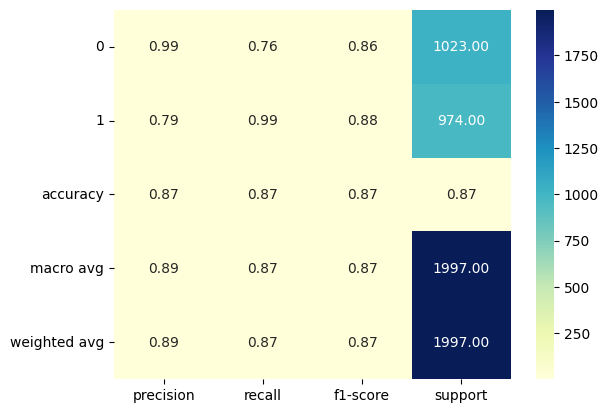

In [ ]:
Eval(Forest, X_test_scaled, y_test)

2. SVM

In [ ]:
'''
from sklearn.svm import SVC
svm_classifier = SVC(kernel='rbf', C=1)  # You can choose different kernel and hyperparameters
svm_classifier.fit(X_train_scaled, y_train)
'''

"\nfrom sklearn.svm import SVC\nsvm_classifier = SVC(kernel='rbf', C=1)  # You can choose different kernel and hyperparameters\nsvm_classifier.fit(X_train_scaled, y_train)\n"

In [ ]:
##Eval(svm_classifier, X_test_scaled, y_test)

3. Logistic Regression

In [ ]:
{'newton-cholesky':83, 'lbfgs', 'newton-cg', 'sag':83, 'saga':83, 'liblinear'}

SyntaxError: ':' expected after dictionary key (1918393593.py, line 1)

In [ ]:
from sklearn.linear_model import LogisticRegression
logistic_classifier = LogisticRegression(C=0.001, penalty='l1', solver='liblinear')  # You can choose a different solver
logistic_classifier.fit(X_train_scaled, y_train)

LogisticRegression(C=0.001, penalty='l1', solver='liblinear')

0.8703054581872809


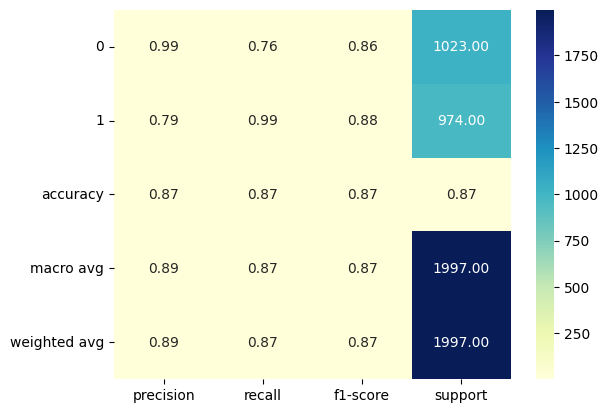

In [ ]:
Eval(logistic_classifier, X_test_scaled, y_test)

0.8703054581872809


<Axes: >

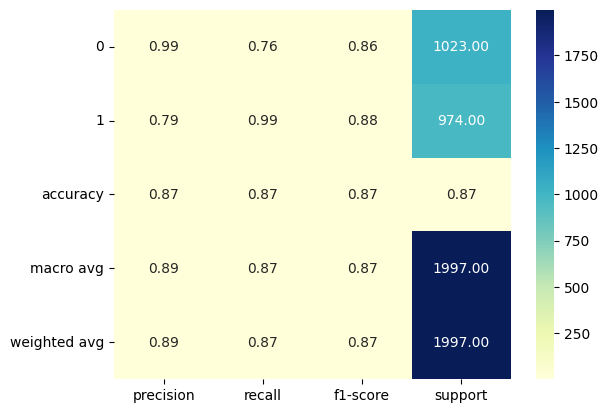

In [ ]:
y_pred = logistic_classifier.predict(X_test_scaled)

    # Assuming y_test and y_pred are your true labels and predicted labels
clf_report = classification_report(y_test, y_pred, output_dict=True)
clf_report_df = pd.DataFrame(clf_report).transpose()



print(accuracy_score(y_test, y_pred))

    # Create a heatmap using Seaborn
sns.heatmap(clf_report_df, annot=True, cmap='YlGnBu', fmt=".2f")

4. Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
decision_tree_classifier = DecisionTreeClassifier(max_depth=1)
decision_tree_classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=1)

c:\Users\eon8w\anaconda3\envs\rl\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.8703054581872809


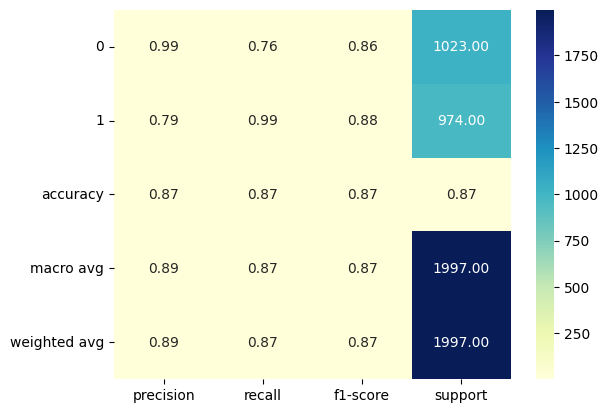

In [ ]:
Eval(decision_tree_classifier, X_test_scaled, y_test)

XGBoost

In [ ]:
import xgboost as xgb
xgb_classifier = xgb.XGBClassifier( learning_rate= 0.01)
xgb_classifier.fit(X_train, y_train)

c:\Users\eon8w\anaconda3\envs\rl\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\eon8w\anaconda3\envs\rl\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\eon8w\anaconda3\envs\rl\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\eon8w\anaconda3\envs\rl\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float 

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

c:\Users\eon8w\anaconda3\envs\rl\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\eon8w\anaconda3\envs\rl\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\eon8w\anaconda3\envs\rl\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.5122684026039058


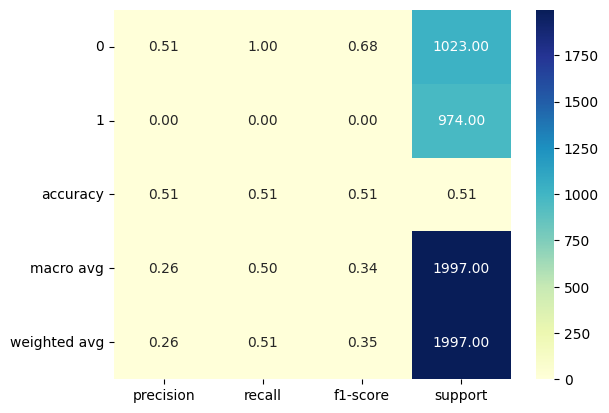

In [ ]:
Eval(xgb_classifier, X_test_scaled, y_test)

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Generate some example data (replace with your actual data)
X_train = X_train_scaled
#y_train = pd.get_dummies(y_train).astype(int)
#y_train_binary = np.argmax(y_train, axis=1)
# Define the RNN model
model = Sequential()
model.add(LSTM(64, input_shape=(X_train.shape[1], 1)) ) # Adjust units as needed
model.add(Dense(1, activation='sigmoid'))  # Binary classification

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Reshape the data to match the expected input shape (batch_size, sequence_length, input_features)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

# Evaluate the model, make predictions, etc.


In [ ]:
type(X_test)

In [ ]:
# Assuming your test data is a DataFrame or Series
# Convert it to a NumPy array
#X_test = X_test_scaled.values  # If X_test is a DataFrame
#y_test = y_test.values  # If y_test is a Series
X_test = X_test_scaled.to_numpy()  # If X_test is a DataFrame
y_test = y_test.to_numpy()  # If y_test is a Series

# Reshape the test data to match the input shape
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Continue with evaluating and making predictions as needed


0.47368421052631576


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Axes: >

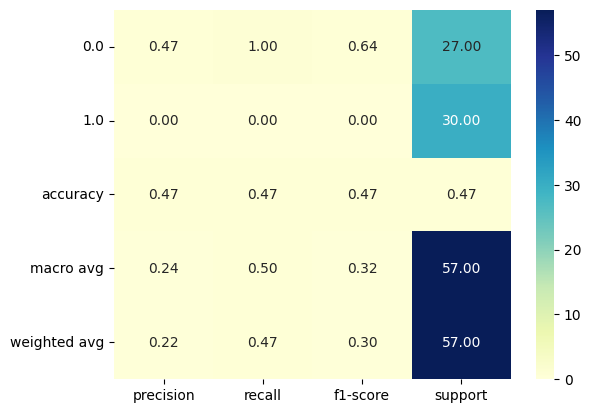

In [ ]:

# Assuming y_test and y_pred are your true labels and predicted labels
y_pred = (y_pred > 0.5).astype(int)
clf_report = classification_report(y_test, y_pred, output_dict=True)
clf_report_df = pd.DataFrame(clf_report).transpose()



print(accuracy_score(y_test, y_pred))

# Create a heatmap using Seaborn
sns.heatmap(clf_report_df, annot=True, cmap='YlGnBu', fmt=".2f")

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense
from keras.optimizers import Adam
from sklearn.metrics import accuracy_score, classification_report

# Preprocessing: Removing NaN values and selecting relevant columns
#df = data.dropna(subset=['Review Text', 'positive'])

# Split the dataset into training and testing sets
#X = df['Review Text']
#y = df['positive']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tokenize the text data
max_words = 10000  # You can adjust this based on your dataset
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

# Pad sequences to have the same length
max_sequence_length = 100  # You can adjust this based on your dataset
X_train_padded = pad_sequences(X_train_sequences, maxlen=max_sequence_length)
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_sequence_length)

# Build an RNN model with LSTM
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_sequence_length))
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Train the model
model.fit(X_train_padded, y_train, batch_size=64, epochs=5, validation_split=0.2)




In [ ]:
# Evaluate the model
y_pred = (model.predict(X_test_padded) > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# You can also print a classification report for more detailed metrics
print(classification_report(y_test, y_pred))